# Final project:

## Hand in instructions:

This project is meant to be done by groups. Needless to say, everyone is expected to collaborate and try to create synergies among the different parts of the mini-project.

Original answers are expected.

You will need to upload a pdf with your final report to google class by the due date. Please, only one memeber of the group uploads the pdf and all the members' names are clearly indicated.

Additionaly, upload the project to your github with all the steps we saw in class. 


## Requirements:

We want to understand and model disease spread focusing on the COVID epidemic. We will first make ose of the COVID19_state.csv dataset to explore the real world data and then simulate a simple contagion model. All the questions below should be hand in in a report-like fashion (remember, this aims to be a project not a problem set). Include all the necesary figures and explanations to make the report explanatory.

This project simulates an hypothetical policy analysis so we, the policy makers, are interested on the following :

- How has been the evolution on the number of cases over time?
- Do tests seem to have some effect?
- What are the subgroups that suffered most?
- If we were to do confinement measures by subgroups of populations, on which groups should we focus to stop the contagion early? 


## Model:

In order to study beforehand the evolution of pandemics, epidemiodiologist model contagion mathematically. We will now simulate with python a simple model of contagion.

- There is a total population of 1000 people. Each one can infect 3 other individuals per day with a probability of 0.05 (let's assume that they are totally independent). There are 10 persons initially infected. 

Simulate and plot the number of infected persons in the next 3 days.

- How many days will it take for the full population to be infected?
- Let's simulate a policy. Suposse we introduce vaccination at period 3. The implications of the vaccine are only for those that are still uninfected. For simplicity, their inmunity is modeled as a reduction in the probability that they get infected of 0.01 pp. How many infections result in the 10th day? 



In [1]:
# Import every library in the first cell
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Importing both datasets

In [2]:
df_daily = pd.read_csv('us_states_covid19_daily.csv',parse_dates=['date'],index_col=['date'])
df_daily.head()

,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-12-06,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,NaN,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
2020-12-06,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,NaN,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2020-12-06,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,374.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
2020-12-06,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
2020-12-06,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,714.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN


In [3]:
df_state = pd.read_csv('COVID19_state.csv')
df_state.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,620170,17057,84,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,1356420,194892,2973,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,1363429,113641,1985,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,1792602,248139,5982,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,18912501,930628,17672,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


### Exploring the data
This section aims to explore both datasets, to gather information about the Covid 19 pandemic in the US

In [4]:
# Only keep the columns we are intrested in -> reduces the size of the dataframe (and size in memory)
df_daily = df_daily[["state","positive","negative","totalTestResults","recovered","death","hospitalized","total"]]
df_daily.head()

,state,positive,negative,totalTestResults,recovered,death,hospitalized,total
date,,,,,,,,
2020-12-06,AK,35720.0,1042056.0,1077776.0,7165.0,143.0,799.0,1077776
2020-12-06,AL,269877.0,1421126.0,1645041.0,168387.0,3889.0,26331.0,1691003
2020-12-06,AR,170924.0,1614979.0,1763150.0,149490.0,2660.0,9401.0,1785903
2020-12-06,AS,0.0,2140.0,2140.0,NaN,0.0,NaN,2140
2020-12-06,AZ,364276.0,2018813.0,2370499.0,56382.0,6950.0,28248.0,2383089


Text(0, 0.5, 'Positive')

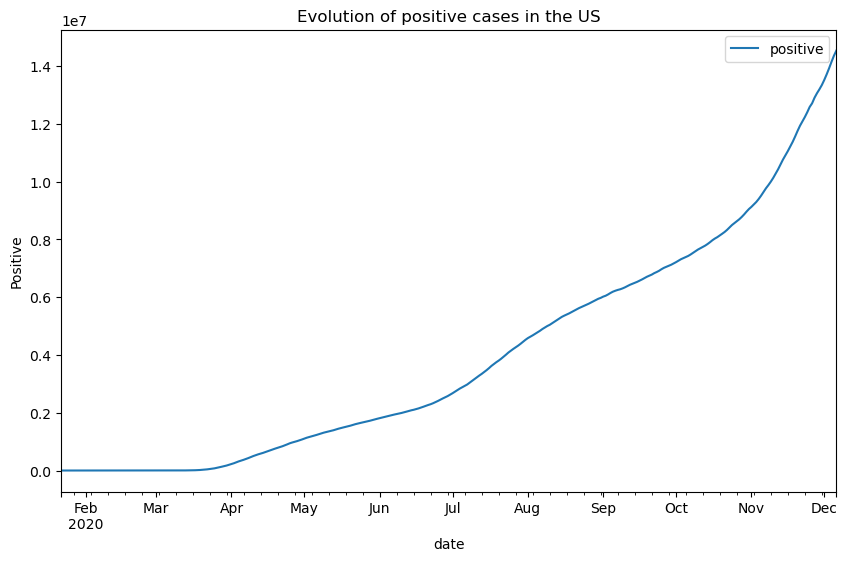

In [11]:
# Plot the evolution of positive cases in the US
positive_over_time = pd.DataFrame(df_daily.groupby('date')['positive'].sum())
positive_over_time.plot(title="Line chart of positive cases over time in the US", figsize=(10,6)).set_ylabel("Positive")

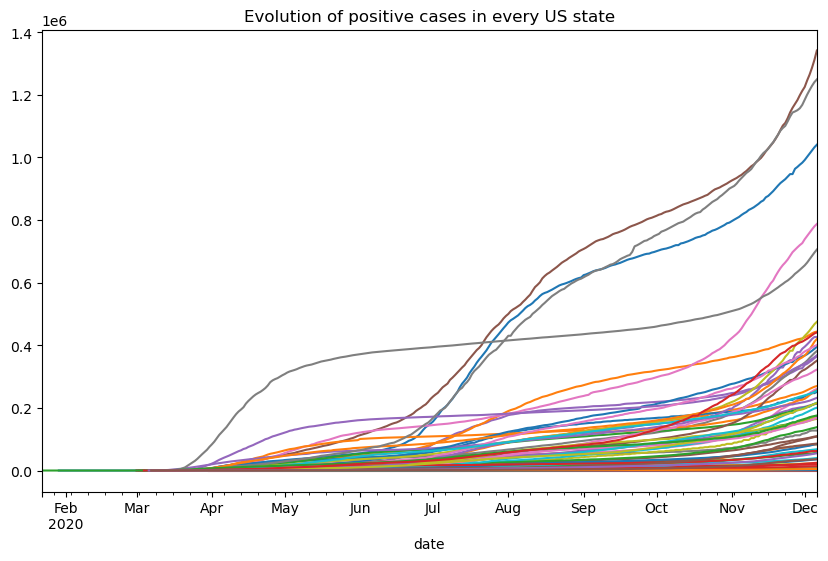

In [16]:
# Plot the evolution of positive cases in every US state
plot = df_daily.groupby("state")["positive"].plot(title="Evolution of positive cases in every US state",figsize=(10,6))

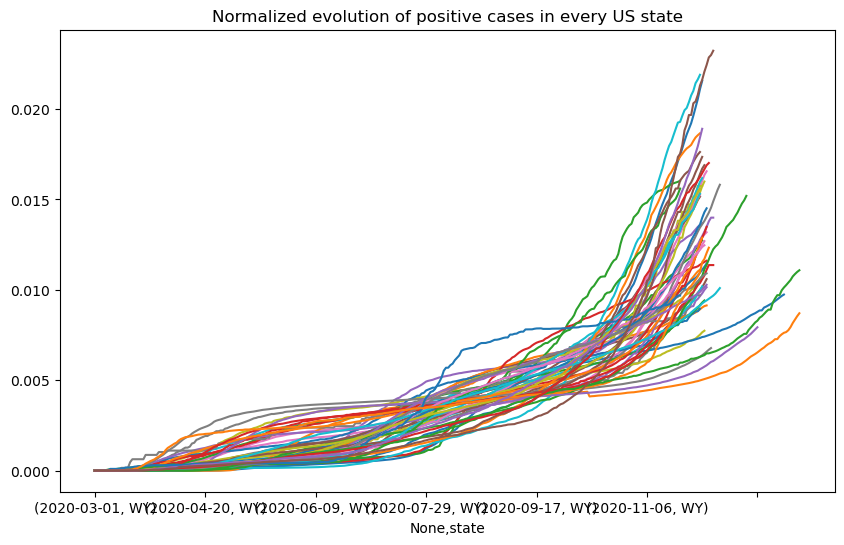

In [37]:
# Normalize the values, as the evolution in low population density states (= Alaska) can not be 
# compared with high population density state (=Florida)

res = df_daily.groupby([df_daily.index.date,"state"])[['positive']].sum()
denom = res.groupby("state")["positive"].sum()
res.positive = res.positive/denom
plot_2 = res.groupby("state")["positive"].plot(title="Normalized evolution of positive cases in every US state",figsize=(10,6))

In [43]:
# The graph above shows the normalized evolution of the new positive cases
# Adding the legend messes up the graph (too many States), so we will only keep the 5 best and 5 worst performing States

# 5 highest growing States = WY, MT, AK, ND, WD
# 5 lowest growing States = AS, DC, NY, NJ, MP
high_growing_states = ["WY", "MT", "AK", "ND", "WD"]
low_growing_states = ["AS", "DC", "NY", "NJ", "MP"]
states_to_keep = high_growing_states+low_growing_states
# Investigate what these states have in common
df_daily_reduced = df_daily.copy()
df_daily_reduced = df_daily_reduced[df_daily_reduced["state"].isin(states_to_keep)]

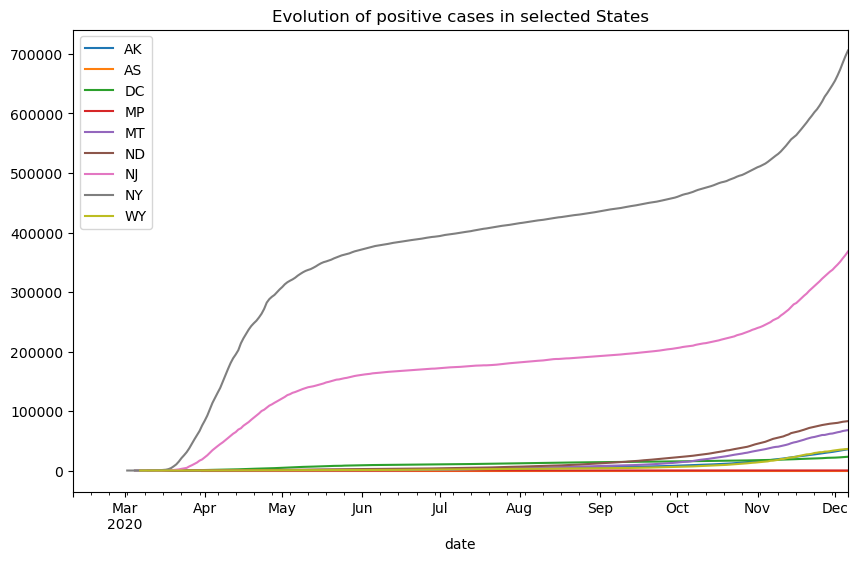

In [44]:
# Show the new graph containing only the best/worst performing States
plot = df_daily_reduced.groupby("state")["positive"].plot(title="Evolution of positive cases in selected States",figsize=(10,6),legend=True)

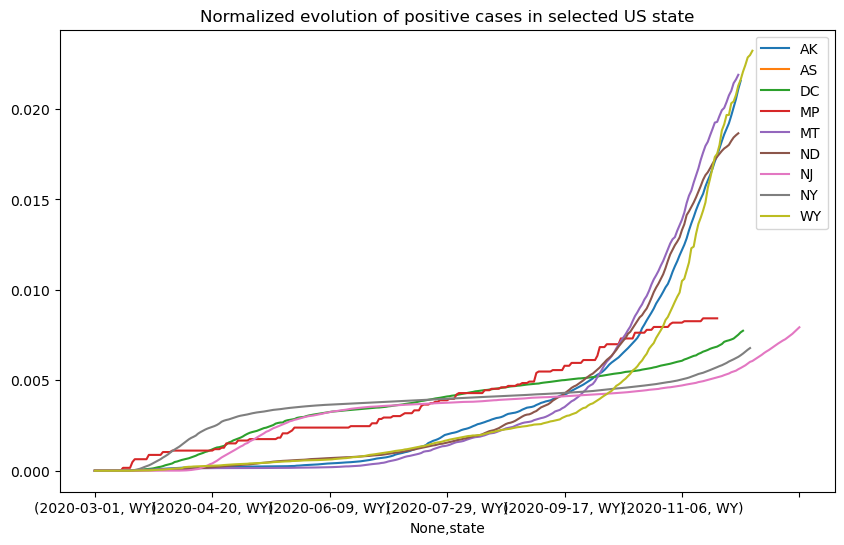

In [45]:
# Normalize the graph show above
res = df_daily_reduced.groupby([df_daily_reduced.index.date,"state"])[['positive']].sum()
denom = res.groupby("state")["positive"].sum()
res.positive = res.positive/denom
plot_2 = res.groupby("state")["positive"].plot(title="Normalized evolution of positive cases in selected US state",figsize=(10,6),legend=True)


Text(0.5, 1.0, 'Evolution of positive,negative,deaths and hospitalized in Alaska')

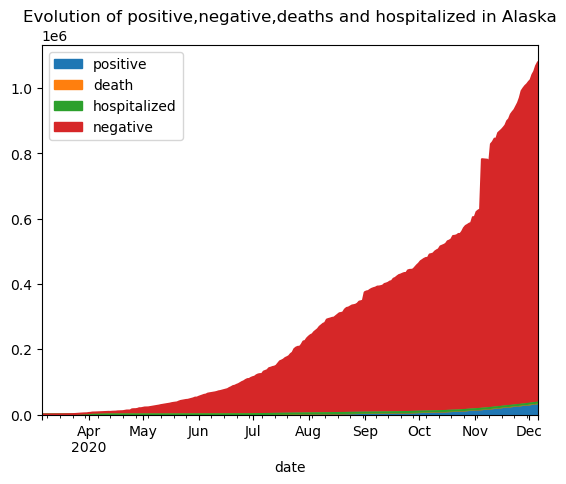

In [80]:
# The AS state (American Samoa) is not shown in the graph as it's positive values are always 0
# The high growing States (AK, MT, ND and WY) seem to have almost the same infection rate over time

# See the progress of positive,negative,deaths and hospitalized in one of the highest growing state
columns = ["positive","death","hospitalized","negative"]
df_area = df_daily_reduced[df_daily_reduced["state"].isin(["AK"])]
plot = df_area[columns].plot.area(stacked=True)
plot.set_title("Evolution of positive,negative,deaths and hospitalized in Alaska")

Text(0.5, 1.0, 'Evolution of positive,negative,deaths and hospitalized in New York (state)')

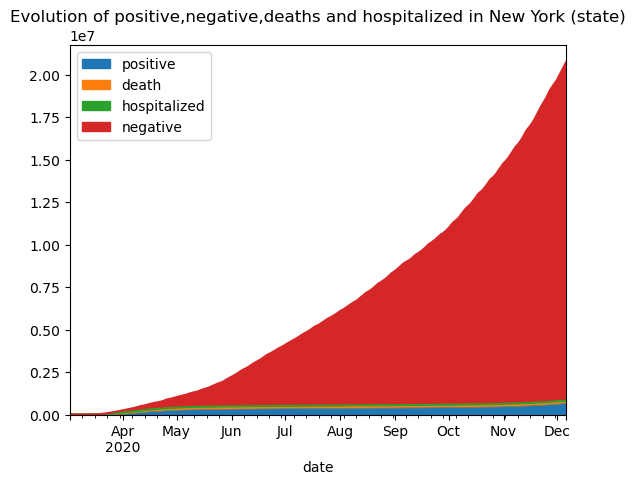

In [82]:
# See the progress of positive,negative,deaths and hospitalized in one of the lowest growing state
columns = ["positive","death","hospitalized","negative"]
df_area = df_daily_reduced[df_daily_reduced["state"].isin(["NY"])]
plot = df_area[columns].plot.area(stacked=True)
plot.set_title("Evolution of positive,negative,deaths and hospitalized in New York (state)")

In [51]:
# Replace the name of the states by their abreviation
us_state_to_abbrev = {"Alabama": "AL","Alaska": "AK","Arizona": "AZ","Arkansas": "AR","California": "CA","Colorado": "CO",
    "Connecticut": "CT","Delaware": "DE","Florida": "FL","Georgia": "GA","Hawaii": "HI","Idaho": "ID","Illinois": "IL",
    "Indiana": "IN","Iowa": "IA","Kansas": "KS","Kentucky": "KY","Louisiana": "LA","Maine": "ME","Maryland": "MD",
    "Massachusetts": "MA","Michigan": "MI","Minnesota": "MN","Mississippi": "MS","Missouri": "MO","Montana": "MT",
    "Nebraska": "NE","Nevada": "NV","New Hampshire": "NH","New Jersey": "NJ","New Mexico": "NM","New York": "NY",
    "North Carolina": "NC","North Dakota": "ND","Ohio": "OH","Oklahoma": "OK","Oregon": "OR","Pennsylvania": "PA",
    "Rhode Island": "RI","South Carolina": "SC","South Dakota": "SD","Tennessee": "TN","Texas": "TX","Utah": "UT",
    "Vermont": "VT","Virginia": "VA","Washington": "WA","West Virginia": "WV","Wisconsin": "WI","Wyoming": "WY",
    "District of Columbia": "DC"
}

abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))
df_state['State'].replace(us_state_to_abbrev, inplace=True)

Text(0, 0.5, 'Percentage infected')

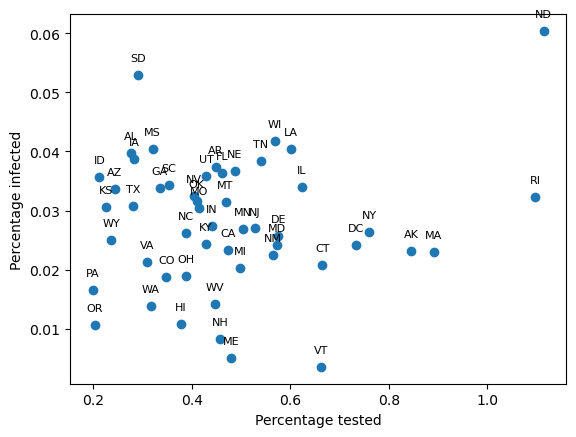

In [52]:
#effects of tests based on infections
df_state['Percentage tested'] = df_state['Tested'] / df_state['Population'].astype(float)
df_state['Percentage infected'] = df_state['Infected'] / df_state['Population'].astype(float)
plt.scatter(df_state['Percentage tested'], df_state['Percentage infected'])
for i, row in df_state.iterrows():
    plt.annotate(row['State'], (row['Percentage tested'], row['Percentage infected']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

plt.xlabel('Percentage tested')
plt.ylabel('Percentage infected')
# -> the more tested the more are infected because it's diagnosted


Text(0, 0.5, 'Percentage death')

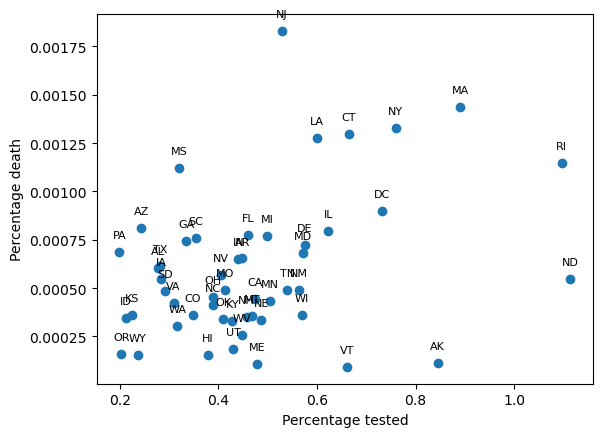

In [54]:
#effects of tests based on deaths
df_state['Percentage deaths'] = df_state['Deaths'] /df_state['Population'].astype(float)
plt.scatter(df_state['Percentage tested'], df_state['Percentage deaths'])
for i, row in df_state.iterrows():
    plt.annotate(row['State'], (row['Percentage tested'], row['Percentage deaths']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.xlabel('Percentage tested')
plt.ylabel('Percentage death')

In [68]:
#subgroups that suffered most
data_sorted_deaths= df_state.sort_values(by='Percentage deaths', ascending=False)
data_sorted_deaths.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date,Percentage tested,Percentage infected,Percentage deaths,Persons per ICU Bed
31,NJ,4721797,240997,16357,8936574,1215.1991,0.4813,1822,67609,69378,...,52.7,94.7,0.31,0.38,0.30,03/18/20,0.528368,0.026967,0.001830,4904.815587
19,MA,6217043,160549,10023,6976597,894.4355,0.4786,1326,70073,82480,...,47.9,92.0,0.30,0.39,0.31,03/17/20,0.891128,0.023013,0.001437,5261.385370
34,NY,14772754,511368,25838,19440469,412.5211,0.5229,3952,68667,85746,...,45.4,87.9,0.31,0.39,0.30,03/18/20,0.759897,0.026304,0.001329,4919.147014
6,CT,2367994,73858,4627,3563077,735.8689,0.4945,674,74561,76342,...,49.0,88.0,0.30,0.38,0.32,03/17/20,0.664592,0.020729,0.001299,5286.464392
18,LA,2788484,187995,5934,4645184,107.5175,0.4990,1289,45542,53589,...,66.4,73.2,0.34,0.37,0.28,03/16/20,0.600296,0.040471,0.001277,3603.711404


Text(0, 0.5, 'Percentage deaths')

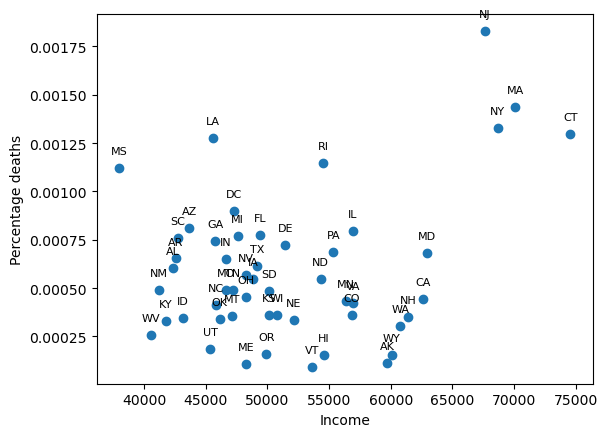

In [57]:
plt.scatter(df_state['Income'], df_state['Percentage deaths'])
for i, row in df_state.iterrows():
    plt.annotate(row['State'], (row['Income'], row['Percentage deaths']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.xlabel('Income')
plt.ylabel('Percentage deaths')
# -> states with higher income had more deaths compared to their population size

Text(0, 0.5, 'Percentage deaths')

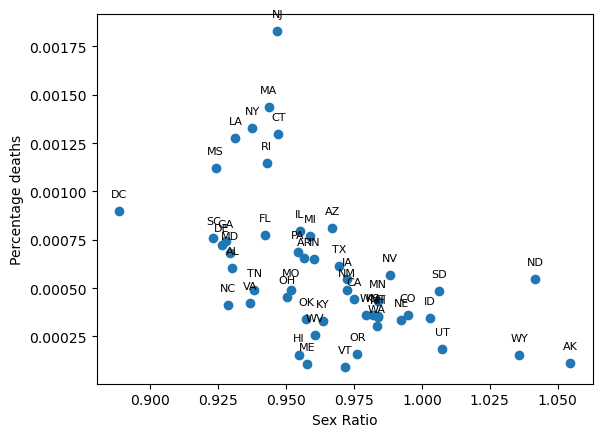

In [58]:
#A sex ratio is the ratio of female to males in a population.
plt.scatter(df_state['Sex Ratio'], df_state['Percentage deaths'])
for i, row in df_state.iterrows():
    plt.annotate(row['State'], (row['Sex Ratio'], row['Percentage deaths']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.xlabel('Sex Ratio')
plt.ylabel('Percentage deaths')
# -> Men suffered more from Covid19

(0.0, 1270.0)

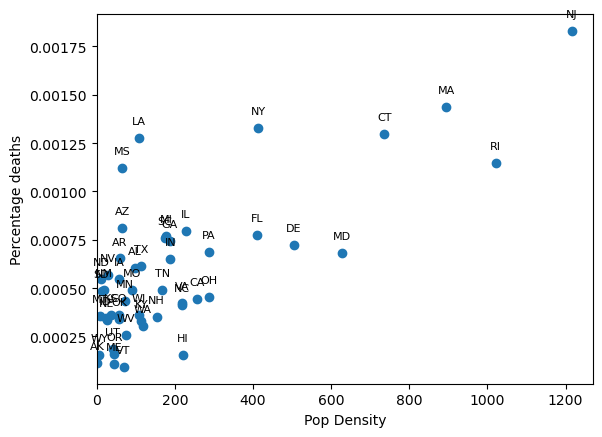

In [59]:
plt.scatter(df_state['Pop Density'], df_state['Percentage deaths'])
for i, row in df_state.iterrows():
    plt.annotate(row['State'], (row['Pop Density'], row['Percentage deaths']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.xlabel('Pop Density')
plt.ylabel('Percentage deaths')

# -> no clear statement because DC is a outlier
plt.xlim(0, 1270)
# -> States with high Population Density had more deaths -> People in overcrowded areas suffered more

Text(0, 0.5, 'Percentage deaths')

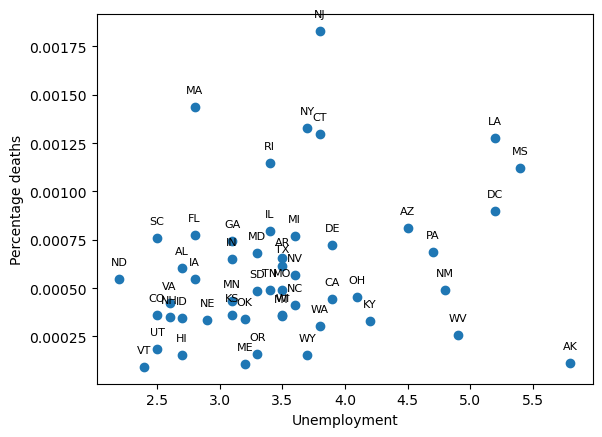

In [60]:
plt.scatter(df_state['Unemployment'], df_state['Percentage deaths'])
for i, row in df_state.iterrows():
    plt.annotate(row['State'], (row['Unemployment'], row['Percentage deaths']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.xlabel('Unemployment')
plt.ylabel('Percentage deaths')
# -> no clear statement

Text(0, 0.5, 'Percentage deaths')

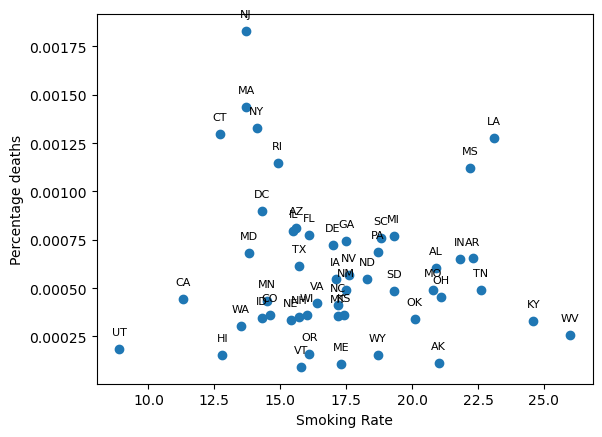

In [61]:
plt.scatter(df_state['Smoking Rate'], df_state['Percentage deaths'])
for i, row in df_state.iterrows():
    plt.annotate(row['State'], (row['Smoking Rate'], row['Percentage deaths']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.xlabel('Smoking Rate')
plt.ylabel('Percentage deaths')
# -> no clear statement

Text(0, 0.5, 'Percentage deaths')

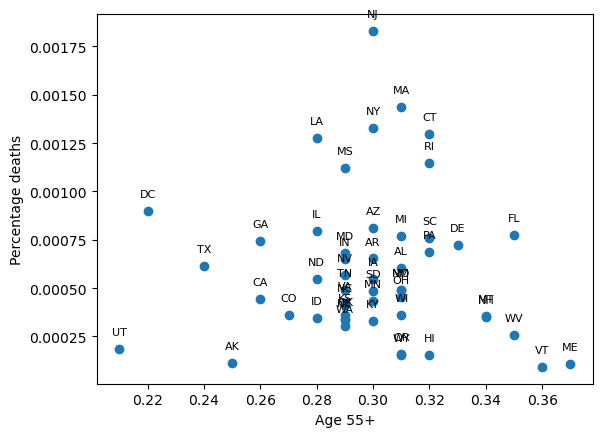

In [62]:
plt.scatter(df_state['Age 55+'], df_state['Percentage deaths'])
for i, row in df_state.iterrows():
    plt.annotate(row['State'], (row['Age 55+'], row['Percentage deaths']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.xlabel('Age 55+')
plt.ylabel('Percentage deaths')
# -> no clear statement

Text(0, 0.5, 'Percentage infected')

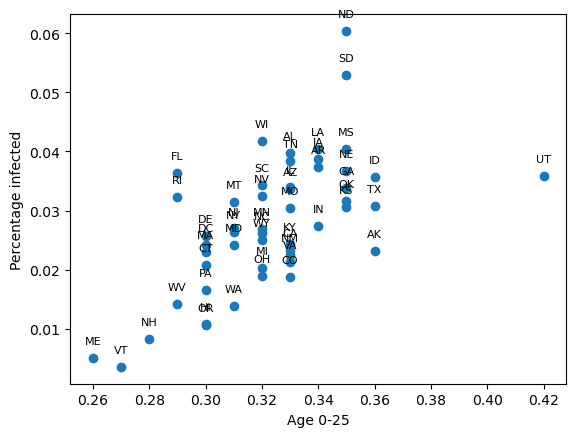

In [63]:
plt.scatter(df_state['Age 0-25'], df_state['Percentage infected'])
for i, row in df_state.iterrows():
    plt.annotate(row['State'], (row['Age 0-25'], row['Percentage infected']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.xlabel('Age 0-25')
plt.ylabel('Percentage infected')
# -> the stated with more younger people had higher percentage of people infected 
# -> confinement measures

Text(0, 0.5, 'Percentage infected')

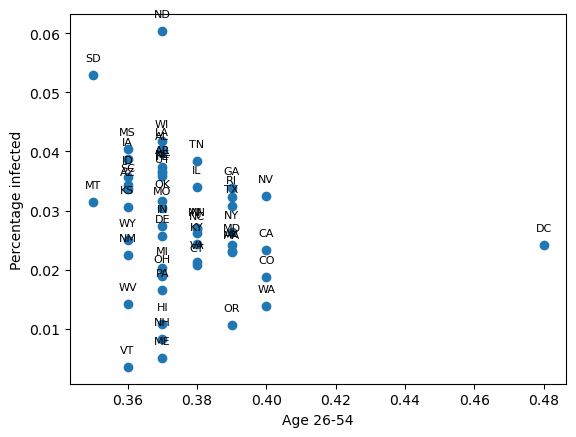

In [64]:
plt.scatter(df_state['Age 26-54'], df_state['Percentage infected'])
for i, row in df_state.iterrows():
    plt.annotate(row['State'], (row['Age 26-54'], row['Percentage infected']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.xlabel('Age 26-54')
plt.ylabel('Percentage infected')

Text(0, 0.5, 'Percentage infected')

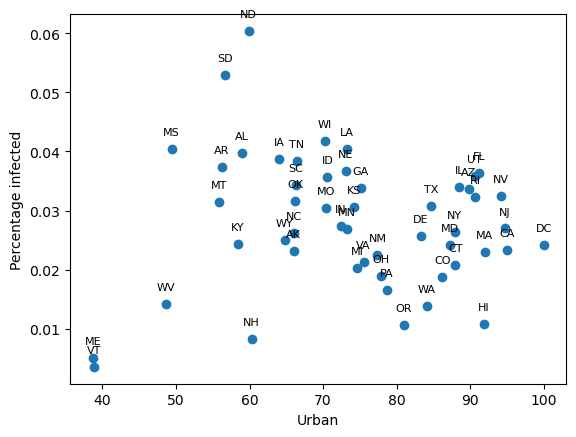

In [65]:
plt.scatter(df_state['Urban'], df_state['Percentage infected'])
for i, row in df_state.iterrows():
    plt.annotate(row['State'], (row['Urban'], row['Percentage infected']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.xlabel('Urban')
plt.ylabel('Percentage infected')
# -> urbanisation doesn't have much of an impact on spreading
# -> no confinement measures

Text(0, 0.5, 'Percentage infected')

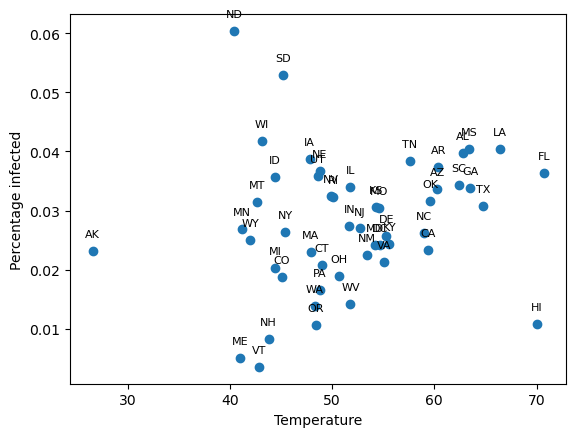

In [66]:
plt.scatter(df_state['Temperature'], df_state['Percentage infected'])
for i, row in df_state.iterrows():
    plt.annotate(row['State'], (row['Temperature'], row['Percentage infected']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.xlabel('Temperature')
plt.ylabel('Percentage infected')
# -> higher infection rates in warmer states
# -> important to set confinement measures first / fast

Text(0, 0.5, 'Percentage deaths')

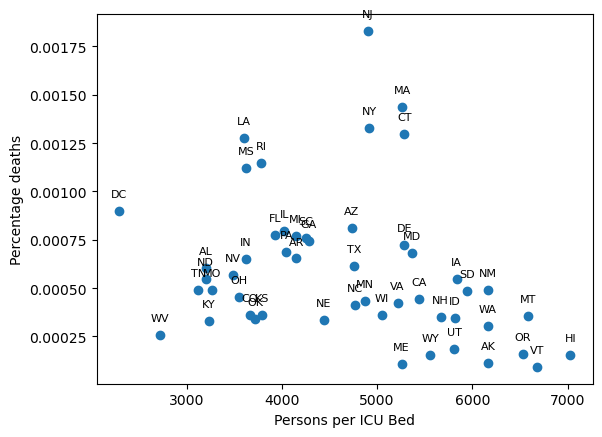

In [67]:
#IMPORTANT FOT THE ARGUMENTATION / REPORT
df_state['Persons per ICU Bed'] = df_state['Population'] / df_state['ICU Beds'].astype(float)
plt.scatter(df_state['Persons per ICU Bed'], df_state['Percentage deaths'])
for i, row in df_state.iterrows():
    plt.annotate(row['State'], (row['Persons per ICU Bed'], row['Percentage deaths']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.xlabel('Persons per ICU Bed')
plt.ylabel('Percentage deaths')
# -> NUmber of ICU Beds has no impact on the death percentage

### Conclusion
-> Small 1-2 sentence conclusion as the developped conclusion will be in the report

## Model
This section is about the model

In [ ]:
# Put code here